In [76]:
import tensorflow as tf
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.optimizers import Adam
import keras.backend
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
import random
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
df_train = pd.read_csv('C:\\Users\\Bermagambet Duisek\\Desktop\\SpotifyFeatures.csv')
df_train.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [3]:
keys = df_train['key'].unique()
for i in range(12):
    df_train.loc[df_train['key'] == keys[i], 'key'] = i

timeSignature = df_train['time_signature'].unique()
for i in range(5):
    df_train.loc[df_train['time_signature'] == timeSignature[i], 'time_signature'] = i


mode = df_train['mode'].unique()
for i in range(2):
    df_train.loc[df_train['mode'] == mode[i], 'mode'] = i
    
genre = df_train['genre'].unique()
for i in range(len(genre)):
    df_train.loc[df_train['genre'] == genre[i], 'genre'] = i

df_train.loc[:,'preference'] = 0
middle_pop = np.average(df_train.popularity)
middle_pop = int(middle_pop)

In [10]:
def distance(first, second):
        dist = 0 # overall distance for two rows of data
        for i in range(len(first) - 1):
            dist += math.pow((first[i] - second[i]), 2) #we calculate here euclidian distance
        return math.sqrt(dist)

def NN(train, test, K):
        dists = list() #list of distances, since the distance() function return distance for only 2 rows
        for train_row in train:
            dist = distance(test, train_row) #calculatin distance for each row
            dists.append((train_row, dist)) #appending to the list
        dists.sort(key=lambda tup: tup[1])
        NNs = list()
        for i in range(K):
            NNs.append(dists[i][0])
        return NNs

def predict(train, test, K):
        NNs = NN(train, test, K) #determining neighbors of the song
        res = [i[-1] for i in NNs]
        prediction = max(set(res), key=res.count) #choosing whether it's 0 or 1
        return prediction

In [11]:
knn_data = df_train.values
size = len(knn_data)

knn_row2 = list()
for i in range(1, size): 
    knn_row2.append([knn_data[i][5],knn_data[i][6], knn_data[i][8], 
                     knn_data[i][9], knn_data[i][11], knn_data[i][12],
                     knn_data[i][14], knn_data[i][18]])

In [12]:
def KNN(id):
    song = ""
    for i in knn_data:
        if id == i[3]:
            song = i
    song = [song[5],song[6], song[8], song[9], song[11], song[12], 
                        song[14], song[18]]
    prediction = predict(knn_row2, song, 5)
    return prediction

In [13]:
KNN("0BRjO6ga9RKCKjfDqeFgWV")

0

The next part is Neural Netwirk to identify whether the given song is popular or not.

In [17]:
df_train.loc[df_train['popularity'] > middle_pop, ['popularity']] = 1 #Popularity is going to be categorical feature
df_train.loc[df_train['popularity'] == middle_pop, ['popularity']] = 1 #Middle_Pop = average popularity value
df_train.loc[df_train['popularity'] != 1, ['popularity']] = 0 #Songs with popualrity > Middle_Pop will have 1, means that they are popular
#The rest is not popular


In [18]:
data = df_train.values #Obtaining array of our rows

Analysis on correlation.

Text(0.5, 1.0, 'Popularity Distribution')

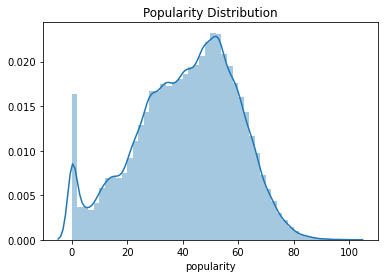

In [47]:
df_popularity = pd.read_csv('C:\\Users\\Bermagambet Duisek\\Desktop\\SpotifyFeatures.csv')
sns.distplot(df_popularity['popularity']).set_title('Popularity Distribution')

Text(0.5, 1.0, 'Popularity Based on Genre')

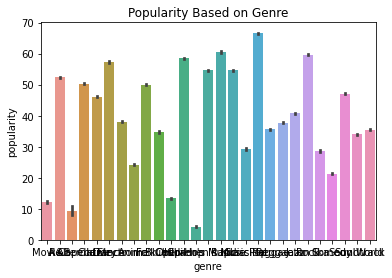

In [48]:
sns.barplot(x = 'genre', y = 'popularity', data = df_popularity)
plt.title('Popularity Based on Genre')

Text(0.5, 1.0, 'Popularity Based on acousticness')

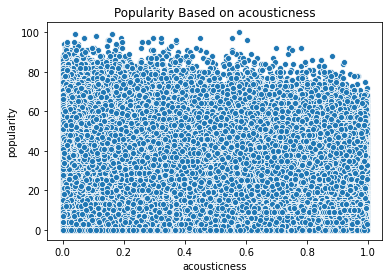

In [49]:
sns.scatterplot(x = 'acousticness', y = 'popularity', data = df_popularity)
plt.title('Popularity Based on acousticness')

Text(0.5, 1.0, 'Popularity Based on Dancability')

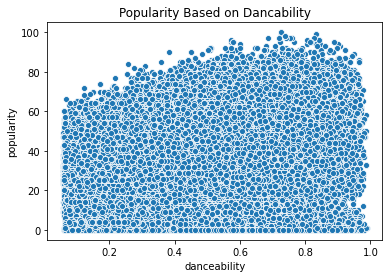

In [50]:
sns.scatterplot(x = 'danceability', y = 'popularity', data = df_popularity)
plt.title('Popularity Based on Dancability')

Text(0.5, 1.0, 'Popularity Based on duration_ms')

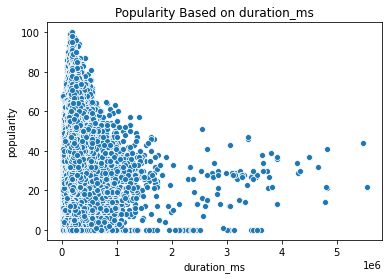

In [51]:
sns.scatterplot(x = 'duration_ms', y = 'popularity', data = df_popularity)
plt.title('Popularity Based on duration_ms')

Text(0.5, 1.0, 'Popularity Based on energy')

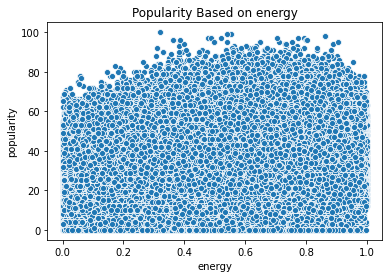

In [52]:
sns.scatterplot(x = 'energy', y = 'popularity', data = df_popularity)
plt.title('Popularity Based on energy')

Text(0.5, 1.0, 'Popularity Based on instrumentalness')

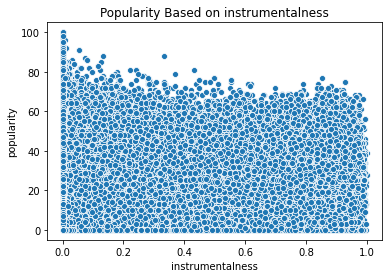

In [53]:
sns.scatterplot(x = 'instrumentalness', y = 'popularity', data = df_popularity)
plt.title('Popularity Based on instrumentalness')

Text(0.5, 1.0, 'Popularity Based on Key')

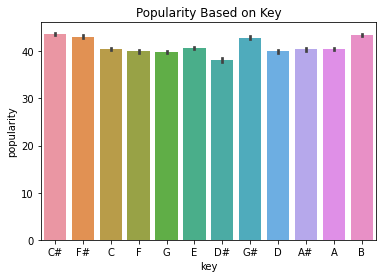

In [54]:
sns.barplot(x = 'key', y = 'popularity', data = df_popularity)
plt.title('Popularity Based on Key')

Text(0.5, 1.0, 'Popularity Based on liveness')

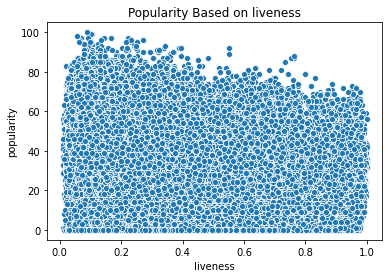

In [55]:
sns.scatterplot(x = 'liveness', y = 'popularity', data = df_popularity)
plt.title('Popularity Based on liveness')

Text(0.5, 1.0, 'Popularity Based on loudness')

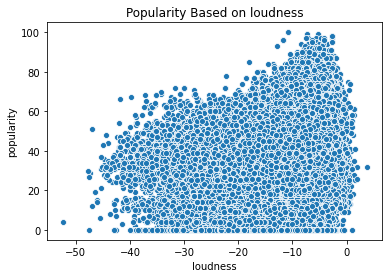

In [56]:
sns.scatterplot(x = 'loudness', y = 'popularity', data = df_popularity)
plt.title('Popularity Based on loudness')

Text(0.5, 1.0, 'Popularity Based on Mode')

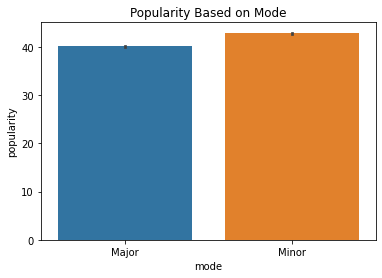

In [57]:
sns.barplot(x = 'mode', y = 'popularity', data = df_popularity)
plt.title('Popularity Based on Mode')

Text(0.5, 1.0, 'Popularity Based on speechiness')

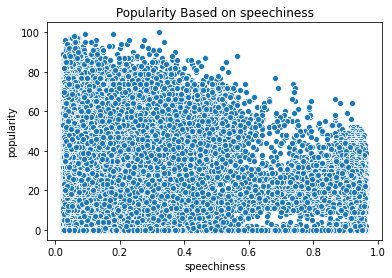

In [58]:
sns.scatterplot(x = 'speechiness', y = 'popularity', data = df_popularity)
plt.title('Popularity Based on speechiness')

Text(0.5, 1.0, 'Popularity Based on tempo')

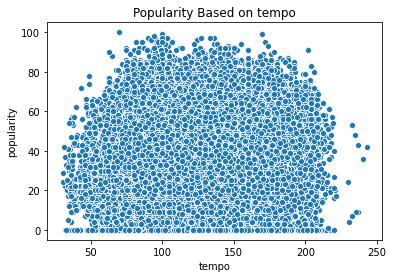

In [59]:
sns.scatterplot(x = 'tempo', y = 'popularity', data = df_popularity)
plt.title('Popularity Based on tempo')

Text(0.5, 1.0, 'Popularity Based on time_signature')

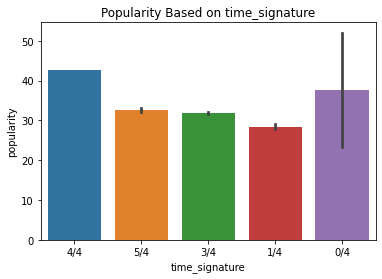

In [60]:
sns.barplot(x = 'time_signature', y = 'popularity', data = df_popularity)
plt.title('Popularity Based on time_signature')

Text(0.5, 1.0, 'Popularity Based on valence')

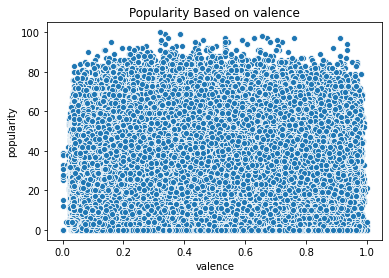

In [61]:
sns.scatterplot(x = 'valence', y = 'popularity', data = df_popularity)
plt.title('Popularity Based on valence')

The end of analysis on correlation.

As the result of such analysis, we can see that only 4 properties can help us with predicting popularity, at least in our particular case, of a given song.

In [19]:
X = df_train[['genre', 'speechiness', 'loudness', 'duration_ms']] #Pick only 4 of them
X = X.values #taking array of values

In [20]:
Y = data[:,4] # the 4th column is Popularity

In [21]:
scaler = preprocessing.MinMaxScaler()
X_scale = scaler.fit_transform(X)

In [22]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.3) # Setting train, test and validation sets of data

In [23]:
print(X_train.shape, X_test.shape, Y_train.shape,Y_test.shape)

(162907, 4) (20946, 4) (162907,) (20946,)


In [24]:
model = Sequential([Dense(500, activation='relu', input_shape=(4,)), Dense(500, activation='relu'), Dense(1, activation='sigmoid'),])
#First model has 500 neurons on each hidden layer, input in a shape of 4, 1 for output.

In [25]:
model.compile(optimizer='sgd',  loss='mean_squared_error', metrics=['accuracy'])

In [269]:
hist = model.fit(X_train, Y_train,  batch_size=32, epochs=100,  validation_data=(X_val, Y_val))
#Accuracy stuck at 83%, not bad, but not the best model out there

Train on 162907 samples, validate on 48872 samples
Epoch 1/100
162907/162907 [==============================] - 16s 99us/step - loss: 0.1562 - accuracy: 0.7662 - val_loss: 0.1641 - val_accuracy: 0.7349
Epoch 2/100
162907/162907 [==============================] - 16s 101us/step - loss: 0.1553 - accuracy: 0.7681 - val_loss: 0.1541 - val_accuracy: 0.7778
Epoch 3/100
162907/162907 [==============================] - 17s 105us/step - loss: 0.1547 - accuracy: 0.7699 - val_loss: 0.1555 - val_accuracy: 0.7691
Epoch 4/100
162907/162907 [==============================] - 17s 103us/step - loss: 0.1544 - accuracy: 0.7723 - val_loss: 0.1498 - val_accuracy: 0.7909
Epoch 5/100
162907/162907 [==============================] - 16s 98us/step - loss: 0.1538 - accuracy: 0.7736 - val_loss: 0.1624 - val_accuracy: 0.7527
Epoch 6/100
162907/162907 [==============================] - 16s 100us/step - loss: 0.1534 - accuracy: 0.7750 - val_loss: 0.1517 - val_accuracy: 0.7760
Epoch 7/100
162907/162907 [============

In [26]:
model_3 = Sequential([    Dense(1000, activation='relu', input_shape=(4,)),    Dense(1000, activation='relu'),    
                      Dense(1000, activation='relu'),    Dense(1000, activation='relu'),    
                      Dense(1, activation='softmax'),])
model_3.compile(optimizer='adam',  loss='mean_squared_error',  metrics=['accuracy'])

In [87]:
hist_3 = model_3.fit(X_train, Y_train,  batch_size=1024, epochs=2, validation_data=(X_val, Y_val))
#It's only 2 epochs there, and the batch size is way too big. This model was tested with better values, but the computational time is enormous,
#and the difference in accurancy, even the increase, is not that huge.

Train on 162907 samples, validate on 48872 samples
Epoch 1/2
162907/162907 [==============================] - 26s 161us/step - loss: 0.4464 - accuracy: 0.5536 - val_loss: 0.4464 - val_accuracy: 0.5536
Epoch 2/2
162907/162907 [==============================] - 27s 165us/step - loss: 0.4464 - accuracy: 0.5536 - val_loss: 0.4464 - val_accuracy: 0.5536


In [88]:
model_2 = Sequential([    Dense(1000, activation='relu', input_shape=(4,)),    
                      Dense(1000, activation='relu'),    Dense(1000, activation='relu'),    
                      Dense(1000, activation='relu'),    Dense(1, activation='sigmoid'),])
model_2.compile(optimizer='adam',  loss='mean_squared_error',  metrics=['accuracy'])
#The best model we managed to implement. Computational time isn't small, to say the least, but 5 epochs is enough to get 85% accuracy level.

In [28]:
hist_2 = model_2.fit(X_train, Y_train,  batch_size=32, epochs=10, validation_data=(X_val, Y_val))

Train on 162907 samples, validate on 48872 samples
Epoch 1/10
162907/162907 [==============================] - 238s 1ms/step - loss: 0.1685 - accuracy: 0.7342 - val_loss: 0.1518 - val_accuracy: 0.7685
Epoch 2/10
162907/162907 [==============================] - 264s 2ms/step - loss: 0.1318 - accuracy: 0.8079 - val_loss: 0.1152 - val_accuracy: 0.8387
Epoch 3/10
162907/162907 [==============================] - 254s 2ms/step - loss: 0.1180 - accuracy: 0.8358 - val_loss: 0.1118 - val_accuracy: 0.8535
Epoch 4/10
162907/162907 [==============================] - 248s 2ms/step - loss: 0.1083 - accuracy: 0.8512 - val_loss: 0.1227 - val_accuracy: 0.8334
Epoch 5/10
162907/162907 [==============================] - 250s 2ms/step - loss: 0.1078 - accuracy: 0.8518 - val_loss: 0.1050 - val_accuracy: 0.8555
Epoch 6/10
162907/162907 [==============================] - 250s 2ms/step - loss: 0.1116 - accuracy: 0.8473 - val_loss: 0.1039 - val_accuracy: 0.8574
Epoch 7/10
162907/162907 [=======================

In [1]:
model_2.evaluate(X_test, Y_test)[1]

NameError: name 'model_2' is not defined

In [70]:
testing = model_2.predict(X_test)
print(Y_test[105])
print(xd[105])

mistakes= 0
#Evaluation of accuracy
for i in range(0, len(Y_test)):
    if testing[i] > 0.8:
        if Y_test[i] != 1:
            mistakes += 1
    if testing[i] < 0.8:
        if Y_test[i] != 0:
            mistakes += 1
accuracy = 100 - (mistakes / (len(Y_test)/100))
print("Accuracy is ", accuracy)
print("Number of mistakes is ", mistakes)


0
[0.02198869]
Accuracy is  82.22094910722811
Number of mistakes is  3724


Regression for filling up recommendation list

In [71]:
eta = 0.05
epoch = 300

In [72]:
df_preference = pd.read_csv('C:\\Users\\Bermagambet Duisek\\Desktop\\SpotifyFeatures.csv')

In [73]:
#Data normalization
def prepare_labels(y):
    values = np.array(y)
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    
    y = integer_encoded
    return y, label_encoder

In [79]:
genreLabels, lab_encoderGenre = prepare_labels(df_preference['genre'])
artist_nameLabels, lab_encoderArtist_name = prepare_labels(df_preference['artist_name'])
keyLabels, lab_encoderKey = prepare_labels(df_preference['key'])
modeLabels, lab_encoderMode = prepare_labels(df_preference['mode'])
timeLabels, lab_encoderTime_signature = prepare_labels(df_preference['time_signature'])
df_preference['artist_name'] = artist_nameLabels
df_preference['genre'] = genreLabels
df_preference['key'] = keyLabels
df_preference['mode'] = modeLabels
df_preference['time_signature'] = timeLabels

In [81]:
df_preference.loc[:,'preference'] = 0
df_preference.preference[0] = 1
df_preference.preference[2] = 1
df_preference.preference[4] = 1
df_preference.preference[6] = 1
df_preference.preference[8] = 1

C:\anac\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\anac\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\anac\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\anac\lib\site-packages\ipy

In [82]:
train_x = df_preference.drop(columns = ['track_name', 'track_id','preference']) #We don't need them
#Track_name and track_id will not help us predicting preferences, as it's clear from the nature of the columns
train_y = df_preference['preference'] #Output data

In [83]:
sc = StandardScaler()
train_x = sc.fit_transform(train_x)

In [84]:
train_y = np.array(train_y)

In [85]:
class LogisticRegression:
    def __init__(self, x, w, y):
        self.inputs  = x
        self.weights = w               
        self.target  = y
        self.output  = np.zeros(self.target.shape)
    
    # Since linear regression is not good for classification
    # We use logistic regression 
    # In logistic regression we take as y not y = w1x1 + w2x2
    # but y = 1/(1 + exp(-(w1x1 + w2x2)))
    def sigmoid(self, x):
        return 1.0/(1+ np.exp(-1.0*np.dot(self.weights, x.T)))
    
    def sigmoid_derivative(self):
        return self.output*(1.0 - self.output)

    def forwardproc(self):
        # forward processing of inputs and weights
        # We use y = 1/(1 + exp(-(w1x1 + w2x2))) to make classification
        # And each cycle in training we slightly recalculate y
        self.output = self.sigmoid(self.inputs)

    def backprop(self):
        # Leave derivatives as it is in Linear Regression model
        dw = self.inputs * (self.output - self.target)

        # update the weights with the derivative of the loss function
        self.weights = self.weights - eta * dw

    def predict(self, x):
        # predict the output for a given input x
        if self.sigmoid(x) >= 0.5: return (self.sigmoid(x), 1)
        else: return (self.sigmoid(x), 0)

    def calculaterror():
        error = -target * math.log(output) - (1-target) * math.log(1-output)
        return abs(error)

In [86]:
if __name__ == "__main__":
    # data normalization on number of rooms and age of the house
    inputdata = train_x
    #acousticness, dancebility, energy, instrumentalness, liveness, loudness, speechiness, valence
    weights = np.random.rand(1, 16)  
    targetvalue = train_y
  
    # training 
    for i in range(epoch):
        j = random.randint(0, len(inputdata) - 1)
        x = np.array([inputdata[j]])
        t = np.array([targetvalue[j]])
        if i == 0: w = weights
        else: w = model.weights 
            
        model = LogisticRegression(x, w, t)    
        for i in range(300):
            model.forwardproc()   # forward processing
            model.backprop()      # backward processing
        
        print("Output:", model.output)
        print("Adjusted Weights 2:", model.weights)

    # verify the output with the adjusted weights
    x1 = train_x[0]
    print ("Output for the input data: ", model.predict(x1))
    
    # predicting and testing the output for a given input data
    x_prediction = train_x[10000]
    predicted_output = model.predict(x_prediction)
    print("Predicted data based on trained weights: ")
    print("Input (scaled): ", x_prediction)
    print("Output: ", predicted_output[0][0] ,"classification: ", predicted_output[1])

Output: [[0.00455012]]
Adjusted Weights 2: [[-0.13935942 -0.4311063   0.09690027  1.19549194 -0.07579862  0.74377042
  -0.23389728  1.14590523 -0.44988558  0.32251454 -0.08897981 -0.52134254
   0.51779515  0.38717055 -0.0500595  -0.63777141]]
Output: [[0.0070894]]
Adjusted Weights 2: [[-0.04169039  0.03516564 -0.07338965  1.52779426 -0.84955236  0.7990581
  -0.38965219  1.36667522 -1.0560539   0.11112539 -0.13578486 -0.19208127
   0.15522699  0.69160744 -0.16662296 -0.29129595]]
Output: [[0.00299035]]
Adjusted Weights 2: [[ 0.04694378 -0.03317095 -0.05577114  1.58196186 -0.86020538  0.81389293
  -0.43829638  1.38537853 -1.15816816  0.09063815 -0.13557526 -0.14642193
   0.17822585  0.76770008 -0.18278706 -0.36846259]]
Output: [[0.00317002]]
Adjusted Weights 2: [[ 0.18769185 -0.17199474  0.04959059  1.66121709 -0.86051598  0.81908107
  -0.54057318  1.429811   -1.28016642  0.00554497 -0.21788934 -0.27059557
   0.07982862  0.72006588 -0.20624678 -0.45883224]]
Output: [[0.00330514]]
Adjuste